# NumPy Tutorial

https://www.w3schools.com/python/numpy/

## Rayleigh Distribution

The W3 description only states that the distribution is used in signal processing.

See the [Wikipedia article here](https://en.wikipedia.org/wiki/Rayleigh_distribution).

The distribution coincides with the chi distribution with two degrees of freedom (and the scale factor for Rayleigh is 1); specifically, if $h$ is Rayleigh distributed then $h^2$ is $\chi^2$ distributed (see [here](https://math.stackexchange.com/questions/4308880/relation-between-rayleigh-and-chi-square-random-variable)).

Furthermore, if $h$ is Rayleigh distributed, then $h^2$ is exponential (and so is $\chi^2$ with $df=2$).

According to the W3 schools site, the scaling factor determines 'how flat' the distribution is, where a larger scaling factor flattens the curve.

[This site](https://www.statisticshowto.com/rayleigh-distribution/) indicates the distribution is used:
- In communications theory, to model multiple paths of dense scattered signals reaching a receiver.
- In the physical sciences to model wind speed, wave heights and sound/light radiation.
- In engineering, to measure the lifetime of an object, where the lifetime depends on the object’s age. For example: resistors, transformers, and capacitors in aircraft radar sets.
- In medical imaging science, to model noise variance in magnetic resonance imaging.

In [2]:
import numpy as np
from configurations import printer

scales_to_cycle_through = [0.1, 0.5, 1, 2, 4]
for scale in scales_to_cycle_through:
    size = 10
    my_array = np.random.rayleigh(scale=scale, size=size)
    printer(
        'This is an array of size %s with scale %s\n:%s\n',
        size,
        scale,
        my_array
    )

This is an array of size 10 with scale 0.1
:[0.17458991 0.18735256 0.09933448 0.11130873 0.15971811 0.16578107
 0.1210885  0.05025102 0.0415244  0.16473367]

This is an array of size 10 with scale 0.5
:[0.53975105 0.55239613 0.73688078 0.5863361  0.71155915 0.55149983
 1.04118086 0.4484112  0.64427429 0.44804106]

This is an array of size 10 with scale 1
:[1.34960075 1.03349031 2.32054314 1.33009354 0.73136947 1.27359533
 1.37898038 0.74826681 0.48634838 1.97477409]

This is an array of size 10 with scale 2
:[0.34836535 2.09671889 5.19420979 1.90555087 0.05044806 1.10160555
 4.76766528 0.90554844 1.55335581 2.00966394]

This is an array of size 10 with scale 4
:[4.43675588 2.21657641 3.63267418 7.48963105 3.33607893 0.84354998
 3.56401449 1.90203318 7.2968     4.83999373]



### Visualization of the Rayleigh distribution


2023-08-26 21:59:55 
	Logger: numpy-tutorial Module: 3895021296 Function: <module> File: 3895021296.py Line: 8
Seaborn does not seem to export a stub to help linters with type hints
so I am explicitly disabling type hints on those lines.


2023-08-26 21:59:55 
	Logger: numpy-tutorial Module: 3895021296 Function: <module> File: 3895021296.py Line: 13
Matplotlib.pyplot does not seem to have types set up for linters.
So I am explicitly disabling type hints on those lines.



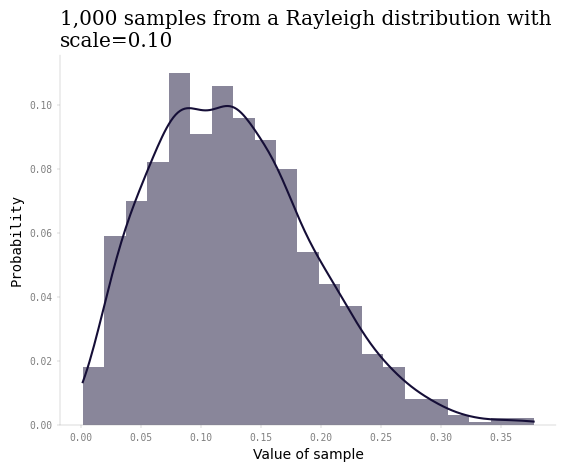

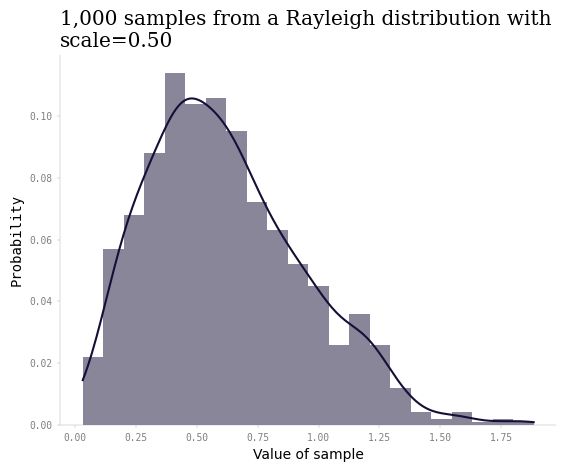

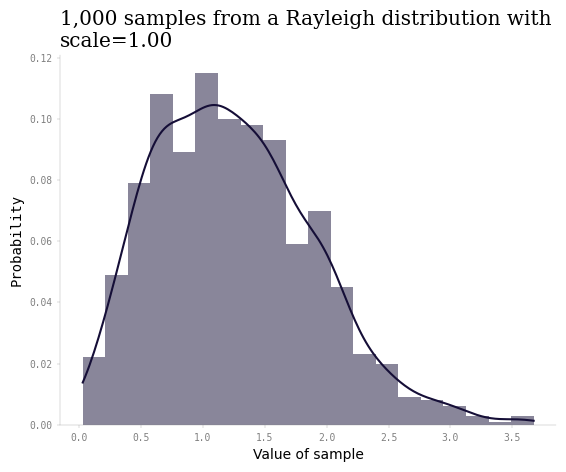

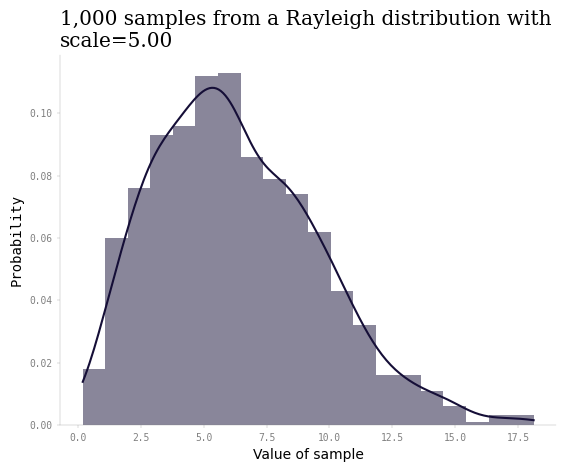

In [5]:
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
from configurations import logger

plt.style.use('my_mpl_stylesheet.mpltstyle')

logger.warning(
    'Seaborn does not seem to export a stub to help linters with type hints\n'
    'so I am explicitly disabling type hints on those lines.'
)

logger.warning(
    'Matplotlib.pyplot does not seem to have types set up for linters.\n'
    'So I am explicitly disabling type hints on those lines.'
)

def plot_rayleigh(
        scale: float = 1,
        size: int = 1_000
    ) -> None:

    my_rayleigh = np.random.rayleigh(scale=scale, size=size)
    
    ax = plt.subplots()[1] # type: ignore
    
    sns.histplot( # type: ignore
        my_rayleigh,
        ax=ax,
        stat='probability',
        edgecolor='None',
        kde=True
        )
    
    plt.title( # type: ignore
        label=f'{size:,} samples from a Rayleigh distribution with\n'
        f'scale={scale:,.2f}',
        family='serif'
        )
    
    plt.xlabel(xlabel='Value of sample', family='sans-serif') # type: ignore

scales_to_cycle_through = [0.1, 0.5, 1, 5]

for scale in scales_to_cycle_through:
    plot_rayleigh(scale=scale)

Recall the information above, that the Rayleigh distribution corresponds to the chi-square distribution when df = 2 and scale = 1. Specifically, if the Rayleigh distribution is squared, then it is the same as the chi-squared distribution.


2023-08-26 22:28:49 
	Logger: numpy-tutorial Module: 3772458136 Function: <module> File: 3772458136.py Line: 8
Seaborn does not seem to export a stub to help linters with type hints
so I am explicitly disabling type hints on those lines.


2023-08-26 22:28:49 
	Logger: numpy-tutorial Module: 3772458136 Function: <module> File: 3772458136.py Line: 13
Matplotlib.pyplot does not seem to have types set up for linters.
So I am explicitly disabling type hints on those lines.



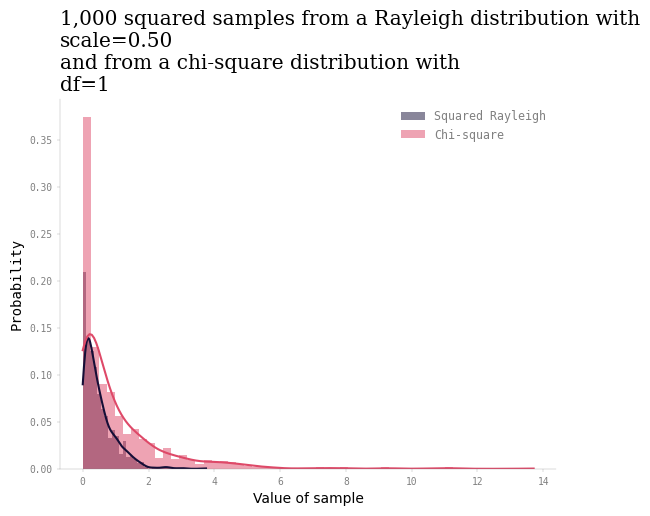

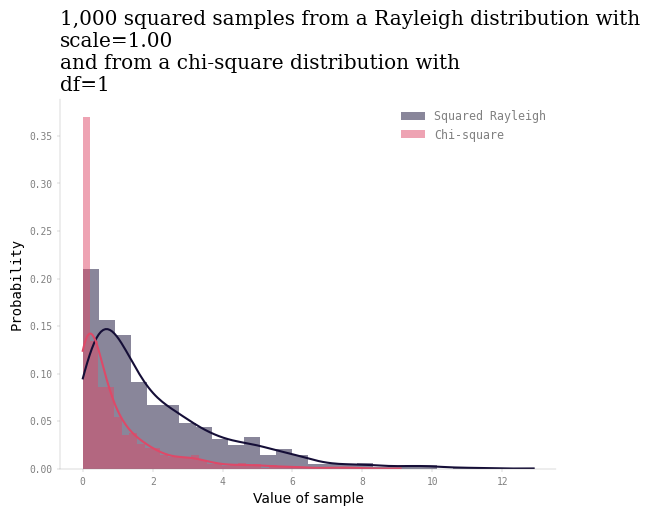

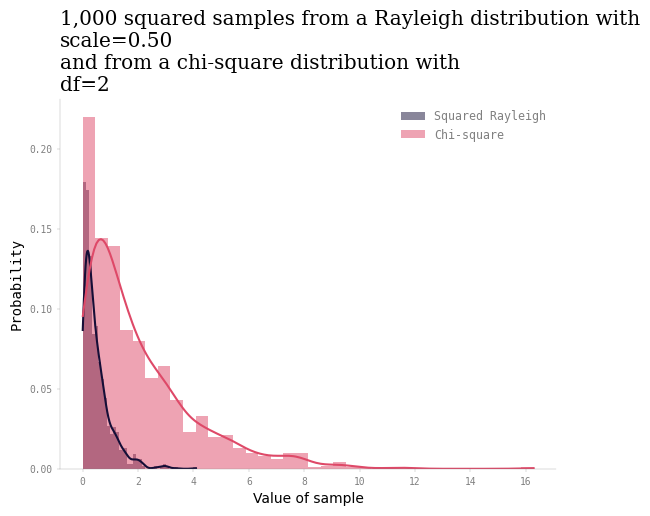

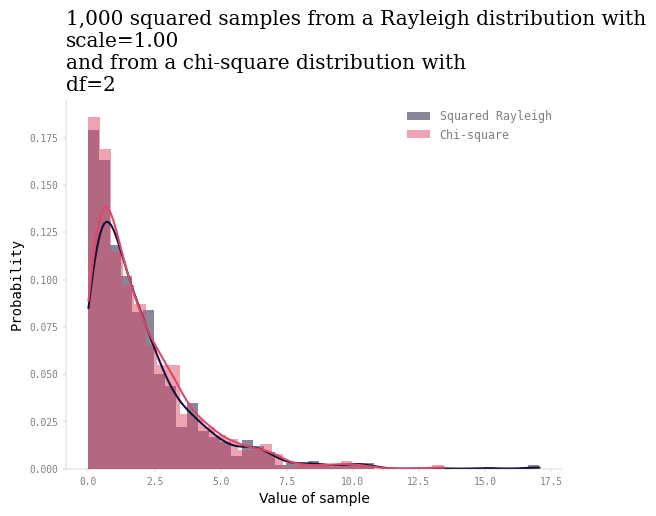

In [19]:
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
from configurations import logger

plt.style.use('my_mpl_stylesheet.mpltstyle')

logger.warning(
    'Seaborn does not seem to export a stub to help linters with type hints\n'
    'so I am explicitly disabling type hints on those lines.'
)

logger.warning(
    'Matplotlib.pyplot does not seem to have types set up for linters.\n'
    'So I am explicitly disabling type hints on those lines.'
)


def choose_my_color(integer: int = 0) -> str:
    return (plt.rcParams["axes.prop_cycle"] # type: ignore
            .by_key()["color"][integer]
            )

def plot_rayleigh_with_exponential_and_chisquare(
        scale: float = 1,
        df: float = 2,
        size: int = 1_000
    ) -> None:

    my_rayleigh = np.random.rayleigh(scale=scale, size=size)
    my_squared_rayleigh = np.square(my_rayleigh)
    my_chi_square = np.random.chisquare(df=df, size=size)
    
    ax = plt.subplots()[1] # type: ignore
    
    sns.histplot( # type: ignore
        my_squared_rayleigh,
        ax=ax,
        stat='probability',
        edgecolor='None',
        kde=True,
        label='Squared Rayleigh',
        color=choose_my_color(0)
        )
    
    sns.histplot( # type: ignore
        my_chi_square,
        ax=ax,
        stat='probability',
        edgecolor='None',
        kde=True,
        label='Chi-square',
        color=choose_my_color(5)
        )

    ax.legend() # type: ignore

    plt.title( # type: ignore
        label=f'{size:,} squared samples from a Rayleigh distribution with\n'
        f'scale={scale:,.2f}\n'
        'and from a chi-square distribution with\n'
        f'df={df:,.0f}',
        family='serif'
        )
    
    plt.xlabel(xlabel='Value of sample', family='sans-serif') # type: ignore

dfs_to_cycle_through = [1, 2]
scales_to_cycle_through = [0.5, 1]

for df in dfs_to_cycle_through:
    for scale in scales_to_cycle_through:
        plot_rayleigh_with_exponential_and_chisquare(scale=scale, df=df)